## Exploratory data analysis (Part 1)

This is the EDA part of the project, if you'd like to see the feature selection & machine learning part look for the other notebook.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('bank-full.csv', sep=';')

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df.shape

(45211, 17)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


It seems like there is no null value, we'll inspect that a little more later.

In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Identify the columns data type

In [78]:
col_nominal = ['job', 'marital', 'default','housing','loan','contact','poutcome','y']
col_ordinal = ['month']
col_discrete = ['age','balance','day','duration','campaign','pdays','previous']

## Univariate analysis | Categorical data
i.e : Nominal & ordinal

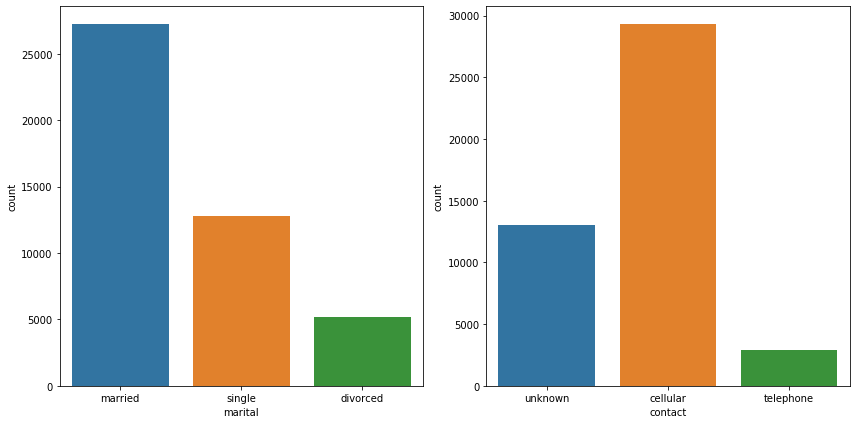

In [70]:
f, ax = plt.subplots(1,2,sharex='none', figsize=(12,6))

sns.countplot(x='marital',data=df,ax=ax[0])
sns.countplot(x='contact',data=df,ax=ax[1])

plt.tight_layout()

Here is the target.

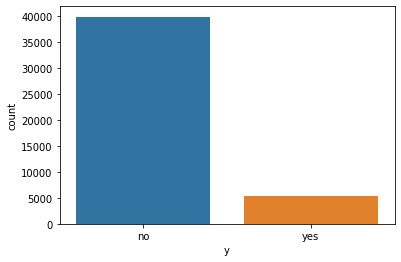

In [14]:
sns.countplot(data=df,x='y')

The data is quite imbalanced, we might want to use a resampling techniques or penalized our model, wich in such we should rethink our performance metrics. 

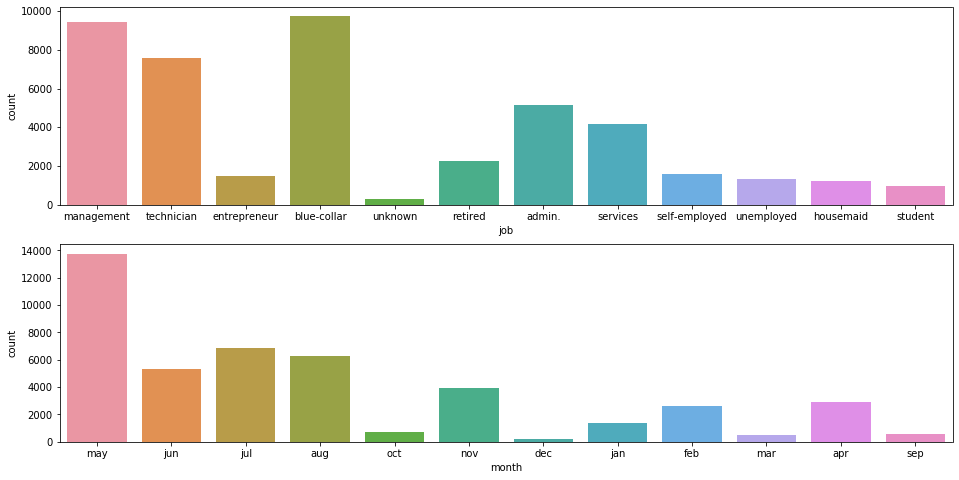

In [56]:
f, ax = plt.subplots(2,1,figsize=(16,8),sharex='none')

sns.countplot(data=df, x='job', ax=ax[0])
sns.countplot(data=df,x='month',ax=ax[1])

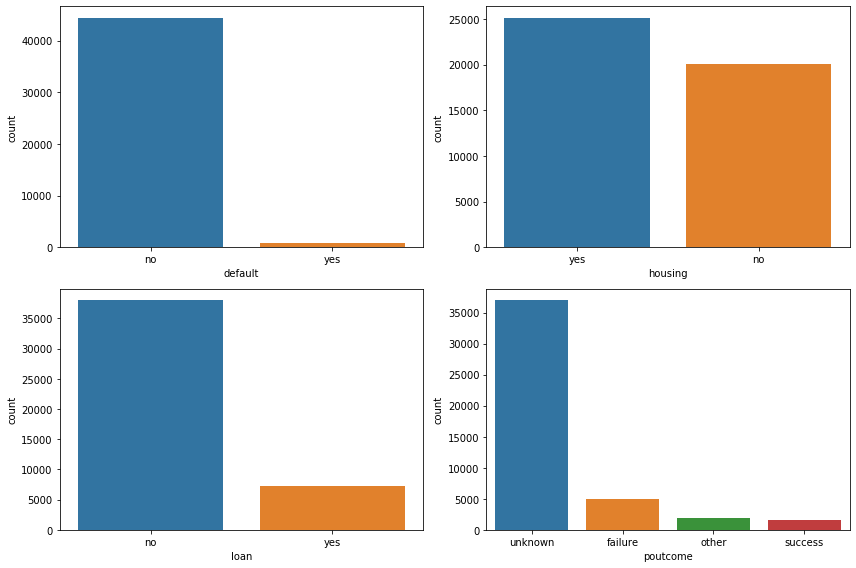

In [73]:
f, ax = plt.subplots(2,2,sharex='none', figsize=(12,8))

sns.countplot(x='default',data=df,ax=ax[0,0])
sns.countplot(x='loan',data=df,ax=ax[1,0])
sns.countplot(x='housing',data=df,ax=ax[0,1])
sns.countplot(x='poutcome',data=df,ax=ax[1,1])

plt.tight_layout()

## Univariate analysis | Numerical data

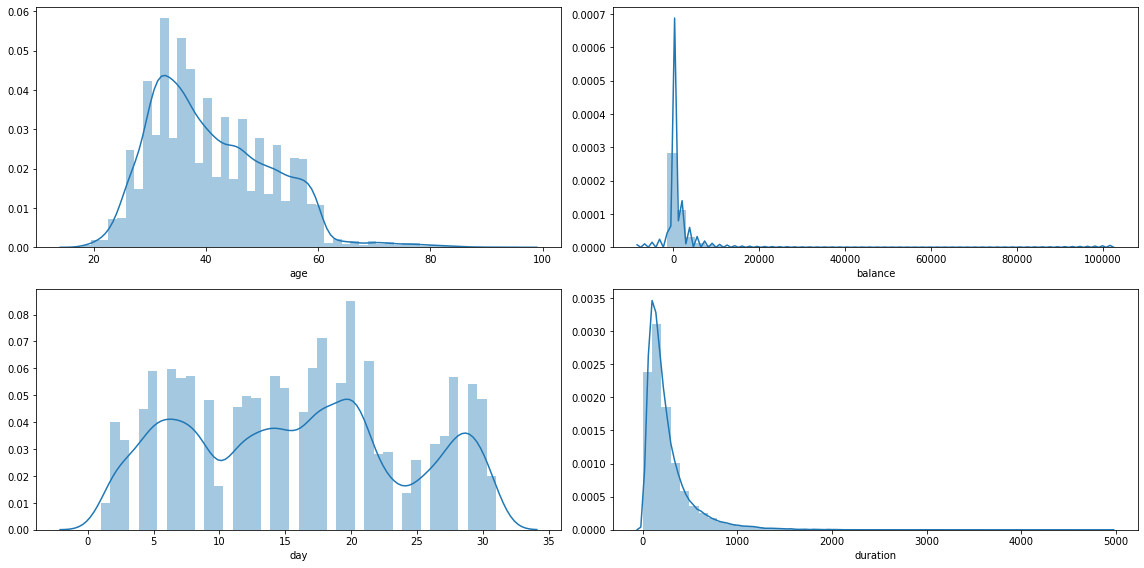

In [89]:
f, ax = plt.subplots(2,2,sharex='none',figsize=(16,8))

sns.distplot(df['age'],ax=ax[0,0])
sns.distplot(df['balance'],ax=ax[0,1])
sns.distplot(df['day'],ax=ax[1,0])
sns.distplot(df['duration'],ax=ax[1,1])

plt.tight_layout()

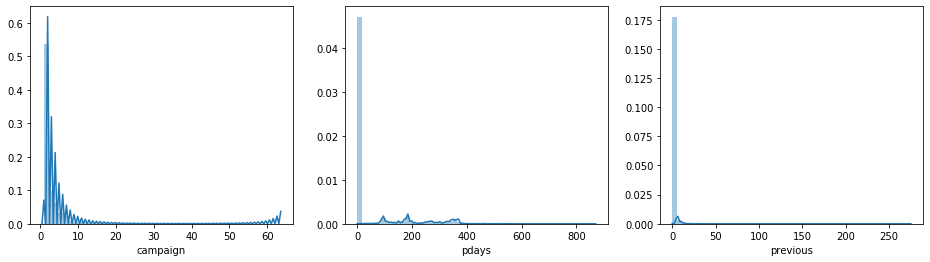

In [91]:
f, ax = plt.subplots(1,3,sharex='none', figsize=(16,4))

sns.distplot(df['campaign'],ax=ax[0])
sns.distplot(df['pdays'],ax=ax[1])
sns.distplot(df['previous'],ax=ax[2])

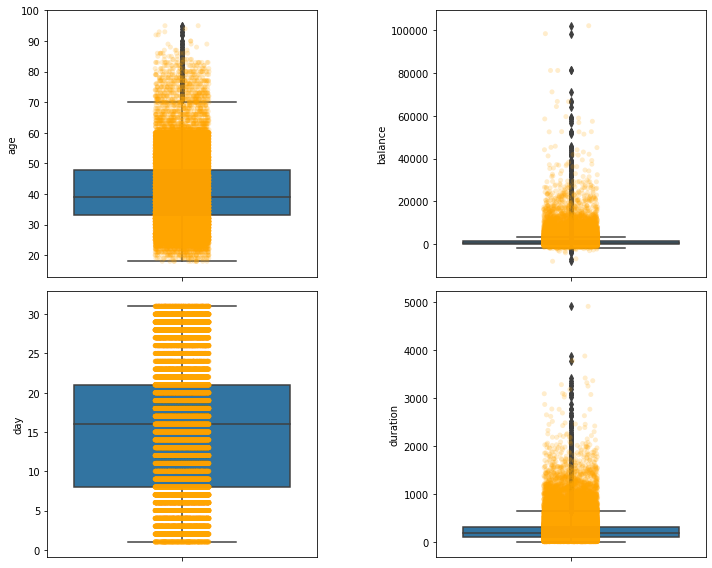

In [120]:
f, ax = plt.subplots(2,2,sharex='none',figsize=(10,8))

sns.boxplot(y=df['age'],ax=ax[0,0])
sns.boxplot(y=df['balance'],ax=ax[0,1])
sns.boxplot(y=df['day'],ax=ax[1,0])
sns.boxplot(y=df['duration'],ax=ax[1,1])

sns.stripplot(y=df['age'],ax=ax[0,0],color='orange',alpha=0.2)
sns.stripplot(y=df['balance'],ax=ax[0,1],color='orange',alpha=0.2)
sns.stripplot(y=df['day'],ax=ax[1,0],color='orange',alpha=0.2)
sns.stripplot(y=df['duration'],ax=ax[1,1],color='orange',alpha=0.2)

plt.tight_layout(w_pad=6)

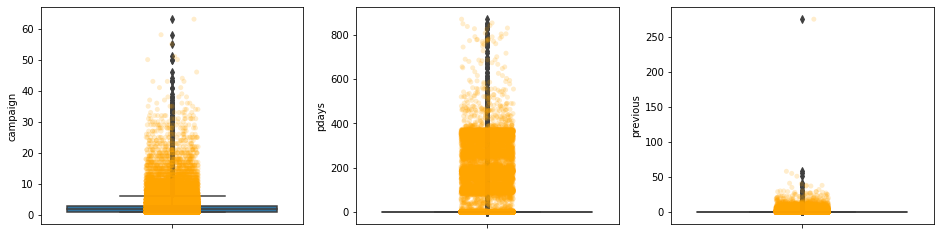

In [121]:
f, ax = plt.subplots(1,3,sharex='none', figsize=(16,4))

sns.boxplot(y=df['campaign'],ax=ax[0])
sns.boxplot(y=df['pdays'],ax=ax[1])
sns.boxplot(y=df['previous'],ax=ax[2])

sns.stripplot(y=df['campaign'],ax=ax[0],color='orange',alpha=0.2)
sns.stripplot(y=df['pdays'],ax=ax[1],color='orange',alpha=0.2)
sns.stripplot(y=df['previous'],ax=ax[2],color='orange',alpha=0.2)

## Multivariate analysis